# Home Price Model Project Part 1

### Read the data 'train.csv' and 'test.csv'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Explore the data

- Check the shape of train and test data

In [5]:
train.shape

(1460, 81)

In [6]:
test.shape

(1459, 80)

- Now we will be focusing on the training set

- Look into column types, filter out numerical variables and categorical variables. How many features are numerical and how many are categorical?

In [7]:
train.dtypes.value_counts()

object     43
int64      35
float64     3
dtype: int64

In [8]:
train_num = train.select_dtypes(exclude='object')
train_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


#### First we perform analysis on numerical variables 

- Remove Id column

In [9]:
train_num.drop(columns='Id', inplace=True)

/Users/yiyitan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


- Check the distribution of SalePrice with Histogram

<AxesSubplot:>

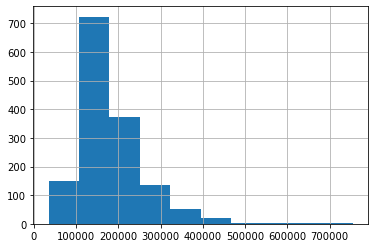

In [10]:
train_num['SalePrice'].hist()

- Is the distribution close to normal? If not, how do we normalize it? And show the result.

In [11]:
train_num['SalePrice'] = np.log(train_num['SalePrice'])
train_num.head()

/var/folders/c_/s3n_lgp93kd3wq43jmqg6x5m0000gn/T/ipykernel_1793/2841880047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_num['SalePrice'] = np.log(train_num['SalePrice'])


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,12.247694
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,12.109011
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,12.317167
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,11.849398
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,12.429216


<AxesSubplot:>

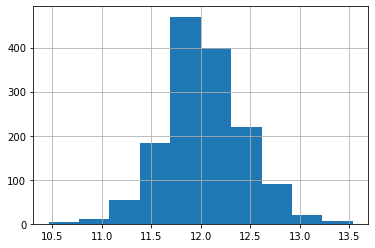

In [12]:
train_num['SalePrice'].hist()

- List of features with missing values, and the percentage of missing

- Try filling the missing values

- Calculate correlation between SalePrice and all numerical variables, and sort them

In [13]:
train_num.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355878
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64

- Pick variables with abs of correlation greater than 0.2 and Create correlation matrix for all numerical variables

In [14]:
great_2 = train_num.loc[:, np.abs(train_num.corr()['SalePrice']) > 0.2]
great_2.corr()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
LotFrontage,1.000000,0.426095,0.251646,0.123349,0.088866,0.193458,0.233633,0.132644,0.392075,0.457181,...,0.053532,0.263170,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.355878
LotArea,0.426095,1.000000,0.105806,0.014228,0.013788,0.104160,0.214103,-0.002618,0.260833,0.299475,...,0.014259,0.119690,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,0.257320
OverallQual,0.251646,0.105806,1.000000,0.572323,0.550684,0.411876,0.239666,0.308159,0.537808,0.476224,...,0.273458,0.101676,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,0.817184
YearBuilt,0.123349,0.014228,0.572323,1.000000,0.592855,0.315707,0.249503,0.149040,0.391452,0.281986,...,0.242656,-0.070651,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,0.586570
YearRemodAdd,0.088866,0.013788,0.550684,0.592855,1.000000,0.179618,0.128451,0.181133,0.291066,0.240379,...,0.183331,-0.040581,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,0.565608
MasVnrArea,0.193458,0.104160,0.411876,0.315707,0.179618,1.000000,0.264736,0.114442,0.363936,0.344501,...,0.201444,0.102821,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,0.430809
BsmtFinSF1,0.233633,0.214103,0.239666,0.249503,0.128451,0.264736,1.000000,-0.495251,0.522396,0.445863,...,0.004262,-0.107355,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,0.372023
BsmtUnfSF,0.132644,-0.002618,0.308159,0.149040,0.181133,0.114442,-0.495251,1.000000,0.415360,0.317987,...,-0.041118,0.166643,0.250647,0.051575,0.190708,0.214175,0.183303,-0.005316,0.129005,0.221985
TotalBsmtSF,0.392075,0.260833,0.537808,0.391452,0.291066,0.363936,0.522396,0.415360,1.000000,0.819530,...,-0.048804,0.050450,0.285573,0.339519,0.322445,0.434585,0.486665,0.232019,0.247264,0.612134
1stFlrSF,0.457181,0.299475,0.476224,0.281986,0.240379,0.344501,0.445863,0.317987,0.819530,1.000000,...,-0.119916,0.127401,0.409516,0.410531,0.233449,0.439317,0.489782,0.235459,0.211671,0.596981


- Check the correlation heatmap and explain why certain pairs of variables have high correlation

<AxesSubplot:>

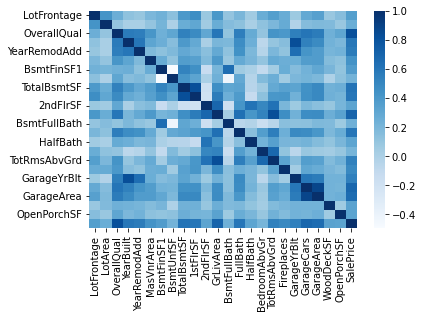

In [15]:
sns.heatmap(data=great_2.corr(), cmap='Blues')

- Findings and Conclusion

In [16]:
# OverallQual, GarageArea, GarageYrBlt variables seems to have a high correlation to SalePrice and we will analyze these variables
# later on in order to build our model. 
# OverallQual, YearBuilt, TotRmsAbvGrd, GrLivArea, FullBath, GarageCars